In [1]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.tree import DecisionTreeRegressor
from sklearn.inspection import permutation_importance
from load_data import GetZeoliteTsv
import matplotlib.pyplot as plt
from sklearn import metrics
from scipy import stats
import seaborn as sns
import pandas as pd
import numpy as np
import joblib
import os
np.random.seed(1)

In [2]:
#zeolite datafile exported from excel
zeolite_fname = "C:\\Users\\DrewX\\Documents\\Project-Roger-Dodger\\Python-ML\\zeolites database catagories june data base.txt"

In [3]:
#open the raw tsv data file 
#the file has to be correctly formatted with columns headers  
zeolite_fileObj = open(zeolite_fname)

In [4]:
#create an instance to start processing the datafile
getZeo = GetZeoliteTsv(zeolite_fileObj)

In [5]:
#Sanity check of datatypes
#important to recognise that datatypes are detected from the files
#this step alsos makes the string variables as categorical variables
getZeo.set_dtypes()

,Adsorbent,SA,Vmicro,Vmeso,pore_size,Si_Al,Na+,Ag+,Cu+,Ce+4,...,R_Ni+2,adsorbate,dipole_moment,chemical_hardness,kinetic_diameter,C_0,solvent,oil_adsorbent_ratio,Temp,Capacity
0,CuAgY,591.00,0.295,NaN,NaN,2.43,0.02,0.47,0.260,NaN,...,NaN,TP,0.57,3.0401,0.77,291,cyclohexane,125,50,16.0
1,CuAgY,591.00,0.295,NaN,NaN,2.43,0.02,0.47,0.260,NaN,...,NaN,TP,0.57,3.0401,0.77,420,cyclohexane,125,50,24.0
2,CuAgY,591.00,0.295,NaN,NaN,2.43,0.02,0.47,0.260,NaN,...,NaN,TP,0.57,3.0401,0.77,556,cyclohexane,125,50,31.0
3,CuAgY,591.00,0.295,NaN,NaN,2.43,0.02,0.47,0.260,NaN,...,NaN,TP,0.57,3.0401,0.77,719,cyclohexane,125,50,34.3
4,CuAgY,591.00,0.295,NaN,NaN,2.43,0.02,0.47,0.260,NaN,...,NaN,TP,0.57,3.0401,0.77,833,cyclohexane,125,50,35.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
351,CuHY,399.29,0.190,NaN,NaN,3.40,0.40,NaN,0.467,NaN,...,NaN,TP,0.51,3.0401,0.77,1100,cyclohexane,20,20,9.8
352,CuHY,399.29,0.190,NaN,NaN,3.40,0.40,NaN,0.467,NaN,...,NaN,TP,0.51,3.0401,0.77,1219,cyclohexane,20,20,10.5
353,CuHY,399.29,0.190,NaN,NaN,3.40,0.40,NaN,0.467,NaN,...,NaN,TP,0.51,3.0401,0.77,1321,cyclohexane,20,20,10.9
354,CuHY,399.29,0.190,NaN,NaN,3.40,0.40,NaN,0.467,NaN,...,NaN,TP,0.51,3.0401,0.77,1418,cyclohexane,20,20,11.2


In [6]:
#this counts the missing records per column and saves them to provided filename
getZeo.missingness("ZeoX_Final_encoded.miss")

,Feature,Missingness
Adsorbent,Adsorbent,0.00
SA,SA,0.00
Vmicro,Vmicro,7.30
Vmeso,Vmeso,73.31
pore_size,pore_size,40.45
Si_Al,Si_Al,0.00
Na+,Na+,41.85
Ag+,Ag+,68.82
Cu+,Cu+,76.69
Ce+4,Ce+4,64.33


In [7]:
#take note of number of columns
getZeo.zeolite_df.shape

(356, 33)

In [8]:
getZeo.df_dtypes

{'Adsorbent': 'category', 'adsorbate': 'category', 'solvent': 'category'}

In [9]:
#Drops empty columns inplace
getZeo.zeolite_df.dropna(how='all', axis=1, inplace = True)

In [10]:
getZeo.zeolite_df.columns

Index(['Adsorbent', 'SA', 'Vmicro', 'Vmeso', 'pore_size', 'Si_Al', 'Na+',
       'Ag+', 'Cu+', 'Ce+4', 'Cs+2', 'Ni+2', 'x_Na+', 'x_Ag+', 'x_Cu+',
       'x_Ce+4', 'x_Cs+2', 'x_Ni+2', 'R_Na+', 'R_Ag+', 'R_Cu+', 'R_Ce+4',
       'R_Cs+2', 'R_Ni+2', 'adsorbate', 'dipole_moment', 'chemical_hardness',
       'kinetic_diameter ', 'C_0', 'solvent', 'oil_adsorbent_ratio', 'Temp',
       'Capacity'],
      dtype='object')

In [11]:
#Very that columns have indeed been lost
getZeo.zeolite_df.shape

(356, 33)

In [12]:
getZeo.missingness("ZeoX_Final_encoded.miss")

,Feature,Missingness
Adsorbent,Adsorbent,0.00
SA,SA,0.00
Vmicro,Vmicro,7.30
Vmeso,Vmeso,73.31
pore_size,pore_size,40.45
Si_Al,Si_Al,0.00
Na+,Na+,41.85
Ag+,Ag+,68.82
Cu+,Cu+,76.69
Ce+4,Ce+4,64.33


In [13]:
#miss = getZeo.missingness("ZeoX_Final_encoded.miss")

In [14]:
getZeo.GroupMeanImputation('Adsorbent','Vmicro')
getZeo.MeanImputation('Vmicro')

In [15]:
getZeo.GroupMeanImputation('Adsorbent','Vmeso')
getZeo.MeanImputation('Vmeso')

In [16]:
getZeo.GroupMeanImputation('Adsorbent','pore_size')
getZeo.MeanImputation('pore_size')

In [17]:
getZeo.GroupMeanImputation('Adsorbent','pore_size')
getZeo.MeanImputation('pore_size')

In [18]:
#Check categorical variables
getZeo.df_dtypes

{'Adsorbent': 'category', 'adsorbate': 'category', 'solvent': 'category'}

In [19]:
#convert the categorical variables to intergers also known as one-hot-encoding
#https://towardsdatascience.com/the-dummys-guide-to-creating-dummy-variables-f21faddb1d40
getZeo.encode_categorical()

[     AgCeY  AgX  AgY  CeY  CsY  CuAgY  CuCeY  CuHY  CuX  CuY  MCM-22  NaY  \
0        0    0    0    0    0      1      0     0    0    0       0    0   
1        0    0    0    0    0      1      0     0    0    0       0    0   
2        0    0    0    0    0      1      0     0    0    0       0    0   
3        0    0    0    0    0      1      0     0    0    0       0    0   
4        0    0    0    0    0      1      0     0    0    0       0    0   
..     ...  ...  ...  ...  ...    ...    ...   ...  ...  ...     ...  ...   
351      0    0    0    0    0      0      0     1    0    0       0    0   
352      0    0    0    0    0      0      0     1    0    0       0    0   
353      0    0    0    0    0      0      0     1    0    0       0    0   
354      0    0    0    0    0      0      0     1    0    0       0    0   
355      0    0    0    0    0      0      0     1    0    0       0    0   

     NiCeY  NiY  clinoptilolite  
0        0    0               0  
1     

In [20]:
#for metal in ['C1', 'C2', 'C3', 'x1', 'x2', 'x3', 'Ri1', 'Ri2', 'Ri3']:
#       getZeo.zerofill(metal)

In [21]:
for metal in ['Na+','Ag+', 'Cu+', 'Ce+4', 'Cs+2', 'Ni+2', 'x_Na+', 'x_Ag+', 'x_Cu+','x_Ce+4', 'x_Cs+2', 'x_Ni+2', 'R_Na+', 'R_Ag+', 'R_Cu+', 'R_Ce+4','R_Cs+2', 'R_Ni+2']:
         getZeo.zerofill(metal)

In [22]:
#save the new data to a tsv file
#getZeo.save_zeo("ZeoX_Final_encoded_V2x.tsv")

In [23]:
#get our dataframe 
zeolite_final  =  getZeo.zeolite_df.copy()

In [24]:
zeolite_final.shape

(356, 57)

In [25]:
zeolite_final.columns

Index(['SA', 'Vmicro', 'Vmeso', 'pore_size', 'Si_Al', 'Na+', 'Ag+', 'Cu+',
       'Ce+4', 'Cs+2', 'Ni+2', 'x_Na+', 'x_Ag+', 'x_Cu+', 'x_Ce+4', 'x_Cs+2',
       'x_Ni+2', 'R_Na+', 'R_Ag+', 'R_Cu+', 'R_Ce+4', 'R_Cs+2', 'R_Ni+2',
       'dipole_moment', 'chemical_hardness', 'kinetic_diameter ', 'C_0',
       'oil_adsorbent_ratio', 'Temp', 'Capacity', 'AgCeY', 'AgX', 'AgY', 'CeY',
       'CsY', 'CuAgY', 'CuCeY', 'CuHY', 'CuX', 'CuY', 'MCM-22', 'NaY', 'NiCeY',
       'NiY', 'clinoptilolite', 'BT', 'DBT', 'TP', '1-octane', 'cyclohexane',
       'ether', 'hexadecane', 'iso-octane', 'n-Heptane', 'n-Octane',
       'n-heptane', 'n-octane'],
      dtype='object')

In [26]:
#check our dataframe
zeolite_final.shape

(356, 57)

In [27]:
#We extract our data features 
#attributes 
y = zeolite_final.loc[:,"Capacity"]
#labels
X = zeolite_final.drop(["Capacity"], axis = 1)

In [28]:
#Split our data into training and test dataset 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [29]:
with open('X_test.np', 'wb') as f1:np.save(f1, X_test)
with open('y_test.np', 'wb') as f2:np.save(f2, y_test)

In [30]:
#num_cols = list(zeolite_final.columns)
num_cols =  list(set(zeolite_final.columns).intersection(getZeo.float_cols))

In [31]:
num_cols.remove('Capacity')

In [32]:
X.columns.get_loc('ether')

49

In [33]:
X_test.iloc[:,49]

6      0
140    1
302    0
220    1
90     0
      ..
164    0
156    0
196    0
63     0
299    0
Name: ether, Length: 72, dtype: uint8

In [34]:
#Standardize features by removing the mean and scaling to unit variasnce
#'Adsorbent','adsorbate': 'category','category'
sc =  ColumnTransformer([('zeolite', StandardScaler(), num_cols)], remainder='passthrough')

In [35]:
#https://datascience.stackexchange.com/questions/12321/whats-the-difference-between-fit-and-fit-transform-in-scikit-learn-models#:~:text=%22fit%22%20computes%20the%20mean%20and,both%20at%20the%20same%20time.
#This should not make much of a difference but its good practice
#TO DO
#Compare accuracy with and without scaling
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [36]:
X_test[:,49]

array([0., 1., 0., 1., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 1., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 1., 0., 0., 1., 0., 0., 1., 0., 0., 0., 0., 0.,
       0., 0., 0., 0.])

In [37]:
regressor = RandomForestRegressor(max_features = 18, n_estimators = 8, max_depth = 20, min_samples_split = 2, min_samples_leaf = 1, random_state=1000)

In [38]:
regressor.fit(X_train, y_train)

RandomForestRegressor(max_depth=20, max_features=18, n_estimators=8,
                      random_state=1000)

In [39]:
joblib.dump(regressor, "project-rodger-dogder-RF_model.obj")
joblib.dump(sc, "project-rodger-dogder-StandardScaler.obj")

['project-rodger-dogder-StandardScaler.obj']

In [40]:
y_pred = regressor.predict(X_test)

In [41]:
plot_data = pd.DataFrame.from_dict({'y_pred': y_pred, 'y_test': y_test, 'errors': y_pred - y_test, 'abs_errors': abs(y_pred - y_test)})
plot_data.to_csv("RF_model_performance.tsv", sep = "\t", index = False)

In [42]:
r2 =  metrics.r2_score(y_test, y_pred)
print(r2)

0.9268786195280787


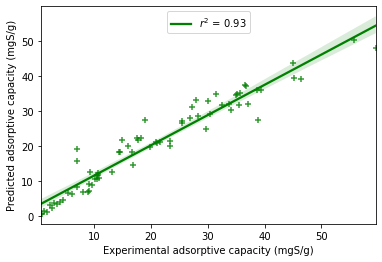

'C:\\Users\\DrewX\\Documents\\Project-Roger-Dodger\\Python-ML'

In [43]:
ax = sns.regplot(y="y_pred",
                 x="y_test", 
                 color="g", 
                 marker="+",
                 line_kws={'label':'$r^2$ = {:.2f}'.format(r2)},
                 data = plot_data)

plt.ylabel('Predicted adsorptive capacity (mgS/g)')
plt.xlabel('Experimental adsorptive capacity (mgS/g)')
ax.legend(loc=9)
plt.savefig('traning_r2.pdf', format='pdf', dpi=1200)
plt.show()
os.getcwd()

In [44]:
regressor.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'criterion': 'mse',
 'max_depth': 20,
 'max_features': 18,
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 8,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 1000,
 'verbose': 0,
 'warm_start': False}

In [45]:
pd.options.display.max_rows = 4000

In [46]:
mae = metrics.mean_absolute_error(y_test, y_pred)
mse = metrics.mean_squared_error(y_test, y_pred)
rmse = metrics.mean_squared_error(y_test, y_pred, squared = False)
mape = metrics.mean_absolute_percentage_error(y_test, y_pred)
r2 =  metrics.r2_score(y_test, y_pred)

In [47]:
data_table = pd.DataFrame.from_dict({"mae": [mae], 
                                     "mse": [mse], 
                                     "rmse":[rmse],
                                     "r2":[r2],
                                     "mape":[mape]})

In [48]:
data_table

,mae,mse,rmse,r2,mape
0,2.555527,14.662776,3.8292,0.926879,0.167593


In [49]:
slope, intercept, r_value, p_value, std_err = stats.linregress(y_test, y_pred)

In [50]:
print("Correlation coefficient (R): {:.4f} ".format(r_value))
print("p-value : {}".format(p_value))
print("Intercept: {:.4f}".format(intercept))
print("Slope: {:.4f}".format(slope))
print("std_error: {:.4f}".format(std_err))

Correlation coefficient (R): 0.9657 
p-value : 1.0364379444242233e-42
Intercept: 3.0225
Slope: 0.8608
std_error: 0.0277


In [51]:
regressor.feature_importances_.shape

(56,)

In [52]:
xnum_cols = list(zeolite_final.columns)
xnum_cols.remove('Capacity')
feature_importance = pd.DataFrame(data = {"features": xnum_cols, "importance":regressor.feature_importances_} )
feature_importance.to_csv("RFX_feature_importance_v2.tsv", sep = "\t", index = False)

In [53]:
os.getcwd()

'C:\\Users\\DrewX\\Documents\\Project-Roger-Dodger\\Python-ML'

In [54]:
#regressor.feature_importances_

In [55]:
feature_importance["importance"] = round(feature_importance["importance"],5)

In [56]:
sum(feature_importance.importance)

1.0000300000000002

In [57]:
feature_importance.sort_values("importance", ascending=False)

,features,importance
18,R_Ag+,0.45634
12,x_Ag+,0.07498
16,x_Ni+2,0.06967
28,Temp,0.05134
25,kinetic_diameter,0.03706
50,hexadecane,0.02703
21,R_Cs+2,0.02374
27,oil_adsorbent_ratio,0.02292
51,iso-octane,0.02233
23,dipole_moment,0.02167


In [58]:
feature_importance['features'] in []

False

In [59]:
result = permutation_importance(regressor, X_train, y_train)

In [60]:
#result.importances_mean

In [61]:
#feature_importance_PI = pd.DataFrame(data = {"features":zeolite_final.drop(["Capacity"], axis = 1).columns, 
#                                          "importance_mean":result.importances_mean,
#                                          "importance_std": result.importances_std} )
#feature_importance_PI.to_csv("RF_feature_importance_PI.tsv", sep = "\t", index = False)

In [62]:
#?result.importances_mean

In [63]:
#feature_importance_PI["importance_mean"] = round(feature_importance_PI["importance_mean"], 5)

In [64]:
#feature_importance_PI.sort_values("importance_mean", ascending=False)

In [65]:
#https://towardsdatascience.com/hyperparameter-tuning-the-random-forest-in-python-using-scikit-learn-28d2aa77dd74
# Number of trees in random forest
n_estimators = list(range(8,9))
# Number of features to consider at every split
max_features = list(range(30,31))
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(20, 40, num = 10)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [1, 2, 4]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree

In [66]:
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf}

In [67]:
#random_grid

In [68]:
# Use the random grid to search for best hyperparameters
# First create the base model to tune
rf = RandomForestRegressor()
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 100000, cv = 10, verbose=2, random_state=1000, n_jobs = -1)
# Fit the random search mode
rf_random.fit(X_train, y_train)

C:\Users\DrewX\.conda\envs\py3k\lib\site-packages\sklearn\model_selection\_search.py:285: UserWarning: The total space of parameters 99 is smaller than n_iter=100000. Running 99 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


Fitting 10 folds for each of 99 candidates, totalling 990 fits


C:\Users\DrewX\.conda\envs\py3k\lib\site-packages\sklearn\model_selection\_search.py:918: UserWarning: One or more of the test scores are non-finite: [       nan 0.91914648 0.90745057        nan 0.90548706 0.90264022
        nan 0.86899309 0.87500003        nan 0.91246578 0.89873717
        nan 0.89396217 0.88669305        nan 0.86451937 0.8781893
        nan 0.91417416 0.89615971        nan 0.89044567 0.88951503
        nan 0.86300801 0.87296082        nan 0.91449668 0.90459808
        nan 0.89450277 0.89401909        nan 0.88061914 0.87328825
        nan 0.90750681 0.89733194        nan 0.90160163 0.9108239
        nan 0.87476524 0.88315177        nan 0.91396533 0.90270898
        nan 0.89695179 0.89515264        nan 0.87259066 0.87515464
        nan 0.92011817 0.90828824        nan 0.90681586 0.89531715
        nan 0.87158882 0.86510211        nan 0.9169456  0.88957781
        nan 0.89252081 0.89284301        nan 0.8610435  0.8759213
        nan 0.89652078 0.90555989        nan 0.88

RandomizedSearchCV(cv=10, estimator=RandomForestRegressor(), n_iter=100000,
                   n_jobs=-1,
                   param_distributions={'max_depth': [20, 22, 24, 26, 28, 31,
                                                      33, 35, 37, 40, None],
                                        'max_features': [30],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [1, 2, 4],
                                        'n_estimators': [8]},
                   random_state=1000, verbose=2)

In [69]:
rf_random.best_params_

{'n_estimators': 8,
 'min_samples_split': 2,
 'min_samples_leaf': 1,
 'max_features': 30,
 'max_depth': 33}

#best_random = rf_random.best_estimator_
#random_accuracy = evaluate(best_random, X_train, y_train)